In [1]:
import uproot
import awkward
import matplotlib.pyplot as plt
import numpy as np

from ROOT import TCanvas, TPad, TFile, TPaveLabel, TPaveText, gROOT, TH1F, gStyle, TGraph, TAttMarker, gPad,TProfile, gRandom,TH1F, TH2F


Welcome to JupyROOT 6.22/03


In [2]:
bb = uproot.open('UU193_bb1.root')
tt = uproot.open('UU193_tt1.root')

In [18]:
file = uproot.open('UU1931.root')

In [25]:
tree = file['tr']

branches =  tree.arrays(namedecode =  'utf-8')


In [3]:
b_tree = bb['tr']
t_tree = tt['tr']

In [4]:
b_branches = b_tree.arrays(namedecode='utf-8')
b_table  = awkward.Table(b_branches)


t_branches = t_tree.arrays(namedecode='utf-8')
t_table  = awkward.Table(t_branches)

In [ ]:
b_px = b_branches['Px'].flatten()
b_py = b_branches['Py'].flatten()
b_pz = b_branches['Pz'].flatten()
b_pid = b_branches['PID'].flatten()



t_px = t_branches['Px'].flatten()
t_py = t_branches['Py'].flatten()
t_pz = t_branches['Pz'].flatten()
t_pid = t_branches['PID'].flatten()


In [38]:
px = branches['Px'].flatten()
py = branches['Py'].flatten()
pz = branches['Pz'].flatten()
pid = branches['PID'].flatten()

In [39]:
chr_mask = ((pid == abs(211)) + (pid == abs(321)) + (pid == abs(2212))).astype(bool)
px_mask =  px!=0   
py_mask =  py!=0
mask = ((chr_mask * px_mask) * py_mask).astype(bool)


In [ ]:
b_chr_mask = ((b_pid == abs(211)) + (b_pid == abs(321)) + (b_pid == abs(2212))).astype(bool)
b_px_mask =  b_px!=0   
b_py_mask =  b_py!=0
b_mask = ((b_chr_mask * b_px_mask) * b_py_mask).astype(bool)


t_chr_mask = ((t_pid == abs(211)) + (t_pid == abs(321)) + (t_pid == abs(2212))).astype(bool)
t_px_mask =  t_px!=0   
t_py_mask =  t_py!=0
t_mask = ((t_chr_mask * t_px_mask) * t_py_mask).astype(bool)





In [ ]:
b_Px = b_px[b_mask]
b_Py = b_py[b_mask]
b_Pt = np.sqrt(b_Px**2 + b_Py**2)
b_phi = np.arctan2(b_Py,b_Px)

t_Px = t_px[t_mask]
t_Py = t_py[t_mask]
t_Pt = np.sqrt(t_Px**2 + t_Py**2)
t_phi = np.arctan2(t_Py,t_Px)

In [ ]:
b_Pz = b_branches['Pz'].flatten()[b_mask]
b_mass = b_branches['Mass'].flatten()[b_mask]

In [ ]:
t_Pz = t_branches['Pz'].flatten()[t_mask]
t_mass = t_branches['Mass'].flatten()[t_mask]


In [ ]:
b_energy =  np.sqrt(b_mass**2 +  (b_Px**2 + b_Py**2 + b_Pz**2))
b_y = np.arctanh(b_Pz/b_energy)


In [ ]:
t_energy =  np.sqrt(t_mass**2 +  (t_Px**2 + t_Py**2 + t_Pz**2))
t_y = np.arctanh(t_Pz/t_energy)


In [41]:
Px = px[mask]
Py = py[mask]
Pt = np.sqrt(Px**2 + Py**2)
phi = np.arctan2(Py,Px)

Pz = branches['Pz'].flatten()[mask]
mass = branches['Mass'].flatten()[mask]

energy =  np.sqrt(mass**2 +  (Px**2 + Py**2 + Pz**2))
y = np.arctanh(Pz/energy)


In [ ]:
cpx = TCanvas( 'cpx', 'px', 200, 10, 500, 500 )

hpx = TH1F('hpx', 'px distro',100,-1,1)


for i  in range(len(b_Px)):
    hpx.Fill(b_Px[i])
    
hpx.Draw()
cpx.Draw()


In [ ]:
cpy = TCanvas( 'cpy', 'py', 200, 10, 500, 500 )

hpy = TH1F('hpy', 'Py distro',100,-6,6)


for i  in range(len(b_Py)):
    hpy.Fill(b_Py[i])
    
hpy.Draw()
cpy.Draw()


In [ ]:
cpz = TCanvas( 'cpz', 'pz', 200, 10, 500, 500 )

hpz = TH1F('hpz', 'Pz distro',100,-50,50)


for i  in range(len(b_Pz)):
    hpz.Fill(b_Pz[i])
    
hpz.Draw()
cpz.Draw()


In [ ]:
cpt = TCanvas( 'cpt', 'pt', 200, 10, 400, 400 )

hpt = TH1F('hpt', 'Pt distro',100,0,3.5)


for i  in range(len(b_Pt)):
    hpt.Fill(b_Pt[i])
    
hpt.Draw()
cpt.Draw()


In [ ]:
cphi = TCanvas( 'cphi', 'phi', 200, 10, 400, 400 )

hphi = TH1F('hphi', 'phi distro',100,-4,4)


for i  in range(len(b_phi)):
    hphi.Fill(b_phi[i])
    
hphi.Draw()
cphi.Draw()


# V2

Warning in <TROOT::Append>: Replacing existing TH1: v2vspt (Potential memory leak).


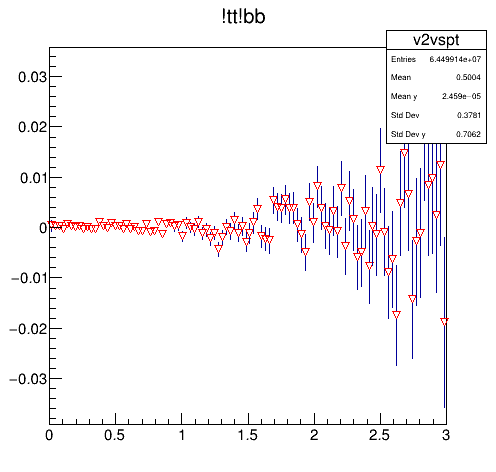

In [43]:
Cv2vspt = TCanvas( 'Cv2vspt', 'v2vspt', 200, 10, 500, 500 )

t_hproff = TProfile('v2vspt', '!tt!bb ',100,0,3,-1,1)

t_hproff.SetMarkerStyle(32)
t_hproff.SetMarkerColor(2)




for i  in range(len(Px)):   # len(PX):length of the array as upper bound of iteration variable
    
    
        
    phi = np.arctan2(Px[i],Py[i])
    
    pt = Pt[i]
    
    if phi < 0:
        phi = phi+2*np.pi
        
    v2 = np.cos(2*phi)
    
    t_hproff.Fill(pt,v2)
    
t_hproff.Draw()

Cv2vspt.Draw()


In [ ]:
b_Cv2vspt = TCanvas( 'Cv2vspt', 'v2vspt', 200, 10, 500, 500 )

b_hproff = TProfile('v2vspt', 'body-body ',100,0,3,-1,1)

b_hproff.SetMarkerStyle(32)
b_hproff.SetMarkerColor(4)






for i  in range(len(b_Px)):   # len(PX):length of the array as upper bound of iteration variable
    
    #if(PX[i] == 0 and PY[i]==0):
        #continue
        
    phi = np.arctan2(b_Px[i],b_Py[i])
    
    pt = b_Pt[i]
    
    if phi < 0:
        phi = phi+2*np.pi
        
    v2 = np.cos(2*phi)
    
    b_hproff.Fill(pt,v2)
    
#hproff.Draw()

#Cv2vspt.Draw()


In [ ]:
b_hproff.Draw("same")
t_hproff.Draw("same")


#v2vspt = TCanvas( 'Cv2vspt', 'v2vspt', 200, 10, 500, 500 )

b_Cv2vspt.Draw("same")
gPad.BuildLegend()


# Spectra

In [ ]:
bh_pt = plt.hist(b_Pt, bins = 150, range =(0,2.5))
b_N = bh_pt[0]
b_bins = bh_pt[1]
b_bin_width = b_bins[1] - b_bins[0]
b_y_range = np.max(b_y) - np.min(b_y)
b_dNdPt =  b_N /b_bin_width
b_d2NdPtdy = b_dNdPt/b_y_range
b_d2NdPtdy = b_d2NdPtdy/(len(b_tree)*2*np.pi)

b_Ptt = []

for i in range(0,len(bh_pt[1])-1):
    
    ptt = (bh_pt[1][i] + bh_pt[1][i+1])/2
    b_Ptt.append(ptt)
    
 
b_pptt =  np.array(b_Ptt)


In [ ]:
from ROOT import TLatex

b_spectra = TCanvas( 'Cv2vspt', 'spectra', 200, 10, 500, 500 )

b_HPROF = TProfile('spectra', 'body-body ',100,0,3,0,100)

b_HPROF.SetMarkerStyle(32)
b_HPROF.SetMarkerColor(4)




for i  in range(len(b_pptt)):   
        
    
    
    b_HPROF.Fill(b_pptt[i],b_d2NdPtdy[i]/b_pptt[i])
    
#b_HPROF.Draw()

#b_spectra.Draw()

#b_HPROF.GetXaxis().SetTitle("Pt")
#HPROF.GetYaxis().SetTitle(" #frac {1}{2\pi * N_{events}}  * #frac {d^{2}N}{dydP_{T}} ")



In [ ]:
th_pt = plt.hist(t_Pt, bins = 150, range =(0,2.5))
t_N = th_pt[0]
t_bins = th_pt[1]
t_bin_width = t_bins[1] - t_bins[0]
t_y_range = np.max(t_y) - np.min(t_y)
t_dNdPt =  t_N /t_bin_width
t_d2NdPtdy = t_dNdPt/t_y_range
t_d2NdPtdy = t_d2NdPtdy/(len(t_tree)*2*np.pi)

t_Ptt = []

for i in range(0,len(th_pt[1])-1):
    
    ptt = (th_pt[1][i] + th_pt[1][i+1])/2
    t_Ptt.append(ptt)
    
 
t_pptt =  np.array(t_Ptt)


In [ ]:
#t_spectra = TCanvas( 'Cv2vspt', 'spectra', 200, 10, 500, 500 )

t_HPROF = TProfile('spectra', 'tip-tip ',100,0,3,0,100)

t_HPROF.SetMarkerStyle(32)
t_HPROF.SetMarkerColor(2)




for i  in range(len(t_pptt)):   
        
    
    
    t_HPROF.Fill(t_pptt[i],t_d2NdPtdy[i]/t_pptt[i])
    
#t_HPROF.Draw()

#t_spectra.Draw()

#t_HPROF.GetXaxis().SetTitle("Pt")
#HPROF.GetYaxis().SetTitle(" #frac {1}{2\pi * N_{events}}  * #frac {d^{2}N}{dydP_{T}} ")


In [ ]:
b_HPROF.Draw("same")
t_HPROF.Draw("same")

b_spectra.Draw("same")

gPad.BuildLegend()




In [ ]:
ratio_ = TCanvas( 'ratio_', '', 200, 10, 400, 400 )

prof_ = TProfile('prof_', '',100,0,3,0.5,2)

prof_.SetMarkerStyle(32)
prof_.SetMarkerColor(2)




for i  in range(len(t_pptt)):   
    
    b = (b_d2NdPtdy[i]/b_pptt[i])
    t = (t_d2NdPtdy[i]/t_pptt[i]) 
        
    prof_.Fill(b_pptt[i], (t/b))
    
prof_.Draw()

ratio_.Draw()

prof_.GetXaxis().SetTitle("Pt")
prof_.GetYaxis().SetTitle("ratio")

In [ ]:
b = (b_d2NdPtdy/b_pptt)
t = (t_d2NdPtdy/t_pptt) 
        

In [ ]:
t.shape

In [ ]:
plt.plot(b_pptt, (t/b))

In [ ]:
plt.plot(b_pptt, np.log(t/b))

In [ ]:
plt.plot(t_pptt, np.log(b/t))

In [ ]:
plt.plot(b_pptt, np.log(b/t))

In [ ]:
b_pptt

In [ ]:
ratio__ = TCanvas( 'ratio__', '', 200, 10, 400, 400 )

prof__ = TProfile('prof__', '',100,0,3,0.5,2)

prof__.SetMarkerStyle(32)
prof__.SetMarkerColor(2)




for i  in range(len(t_pptt)):   
    
    b = (b_d2NdPtdy[i]/b_pptt[i])
    t = (t_d2NdPtdy[i]/t_pptt[i]) 
        
    prof__.Fill(b_pptt[i], (b/t))
    
prof__.Draw()

ratio__.Draw()

prof_.GetXaxis().SetTitle("Pt")
prof_.GetYaxis().SetTitle("ratio")

In [ ]:
dict = {(1,2):3}

In [ ]:
(1,3) not in dict

In [ ]:
dict[(5,6)] = 10

In [ ]:
dict

In [ ]:
DD